In [36]:
import numpy as np
import matplotlib.pyplot as plt

import codecs
import re
import os.path

from sklearn.model_selection import train_test_split

# Données reconnaissance du locuteur (Chirac/Mitterrand)

In [37]:
# Chargement des données:
def load_pres(fname):
    alltxts = []
    alllabs = []
    s=codecs.open(fname, 'r','utf-8') # pour régler le codage
    while True:
        txt = s.readline()
        if(len(txt))<5:
            break
        # 
        lab = re.sub(r"<[0-9]*:[0-9]*:(.)>.*","\\1",txt)
        txt = re.sub(r"<[0-9]*:[0-9]*:.>(.*)","\\1",txt)
        if lab.count('M') >0:
            alllabs.append(-1)
        else: 
            alllabs.append(1)
        alltxts.append(txt)
    return alltxts,alllabs

In [51]:
fname = "./datasets/corpus.tache1.learn.utf8.txt"
alltxts,alllabs = load_pres(fname)

# X = np.array(alltxts)
# Y = np.array(alllabs)

X_train, X_test, Y_train, Y_test = train_test_split(alltxts, alllabs, test_size=0.2, shuffle=False)
train_size = len(X_train)
test_size = len(X_test)
print('Train set length : ',train_size)
print('Test set length  : ',test_size)

Train set length :  6990
Test set length  :  1748


In [42]:
print(len(alltxts),len(alllabs))
print(alltxts[0])
print(alllabs[0])
print(alltxts[-1])
print(alllabs[-1])

8738 8738
 Quand je dis chers amis, il ne s'agit pas là d'une formule diplomatique, mais de l'expression de ce que je ressens.

1
 On est venu ici, non pas pour donner le moindre conseil superflu mais on a évoqué en terminant deux problèmes sur lesquels je voudrais mettre l'
1


In [52]:
X_train

[" Quand je dis chers amis, il ne s'agit pas là d'une formule diplomatique, mais de l'expression de ce que je ressens.\n",
 " D'abord merci de cet exceptionnel accueil que les Congolais, les Brazavillois, nous ont réservé cet après-midi.\n",
 " C'est toujours très émouvant de venir en Afrique car c'est probablement l'une des rares terres du monde où l'on ait conservé cette convivialité, cette amitié, ce respect de l'autre qui s'expriment avec chaleur, avec spontanéité et qui réchauffent le coeur de ceux qui arrivent et de ceux qui reçoivent.\n",
 ' Aucun citoyen français ne peut être indifférent à un séjour à Brazzaville.\n',
 ' Le Congo, que naguère le <nom> qualifia de "refuge pour la liberté", de "base de départ pour la libération", de "môle pour la Résistance", comment ne pas être heureux de s\'y retrouver ?\n',
 ' Comment ne pas y voir un signe ?\n',
 " Brazzaville n'est pas une capitale ordinaire.\n",
 ' Les voies de la libre disposition des peuples et de leur coopération furent 

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(X_train)
print(vectorizer.get_feature_names()[:500]) # we only print a few

['000', '10', '100', '1000', '10000', '100000', '101e', '11', '110', '1100', '12', '120', '1200', '1244', '1295', '13', '14', '141', '1441', '15', '150', '150ème', '16', '160', '16000', '17', '170', '1782', '1789', '18', '1860', '1870', '19', '19ème', '1er', '1h28', '1ère', '20', '200', '200000', '20ème', '21', '22', '22000', '2300000', '23600', '24', '242', '25', '250', '26', '260', '27', '28', '2h15', '2ème', '30', '300', '3000', '30000', '31', '32', '320', '338', '340', '35', '350', '36', '38', '3ème', '3èmes', '40', '400', '400000', '40ème', '4200', '43', '44', '45', '48', '49', '4e', '4ème', '50', '500', '5000', '500000', '51', '52', '55', '550', '60', '600', '61', '63', '64', '70', '700', '75', '80', '800', '81', '82e', '85', '86', '89', '90', '900000', '918', '94', '95', '99', '9ème', 'aaron', 'abaissement', 'abandon', 'abandonne', 'abandonnent', 'abandonner', 'abandonné', 'abandonnée', 'abattre', 'abattu', 'abidjan', 'abm', 'abolir', 'abolit', 'abominables', 'abondante', 'abord

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Document classification :

## A. Processing chain design
**Main steps:**
1. Data reading \& importation
    - The corpus can be loaded in RAM (otherwise, you should use a *data loader* to bufferise the importation)
    - Encoding is a big problem: you have to make sure that the data are correctly read.
2. Data pre-processing, transformation \& filtering
    - remove *useless* information: figures, ponctuations, capitals, *etc*... **usefulness depends on applications! [obviously]**
    - Segment into words (=*Tokenization*)
    - Elimination of stop-words
    - Stemming/lemmatization (rootization)
    - Byte-pair encoding to find compound words (e.g. Sorbonne University, City of Paris, Prime Minister, etc...)
3. Digital data processing (Bag-of-Words)
    - Normalization *term-frequency* / binarization
    - Inverse document frequency* normalization
    - Elimination of rare words, too frequent words
    - Construction of separability criteria to eliminate words etc...
4. Learning a classifier
    - Choice of the type of classifier
    - Adjustment of the parameters of the classifier (regularization, balancing, etc...)

## B. Exploitation of the processing chain

This step is called the realization of a campaign of experiments: it is the key point that we want to work on in NLP this year.
1. It is impossible to test all the combinations in relation to the above proposals... Therefore, we have to eliminate some of them.
    - By discussing with the business experts
    - By doing preliminary tests
1. After this first filtering, we must:
    - Choose an evaluation that is reliable and not too slow (cross-validation, leave-one-out, split learning/single test)
    - Run large experiments
        - = *grid-search
        - parallelise on several machines
        - know how to run on a server and disconnect
1. Collect and analyze results


## C. Inference & industrialization

The inference is then very classical: the optimal processing chain is able to process new documents

# A) Transformation paramétrique du texte (pre-traitements)

Vous devez tester, par exemple, les cas suivants:
- transformation en minuscule ou pas
- suppression de la ponctuation
- transformation des mots entièrement en majuscule en marqueurs spécifiques
- suppression des chiffres ou pas
- conservation d'une partie du texte seulement (seulement la première ligne = titre, seulement la dernière ligne = résumé, ...)
- stemming
- ...


Vérifier systématiquement sur un exemple ou deux le bon fonctionnement des méthodes sur deux documents (au moins un de chaque classe).

In [9]:
import re
import unidecode
import io
import string
import unicodedata

reg = "\b[^\W]\b" #matches word with characters 

# 1) Try removing punctuation or putting text to lower case (maybe use a regex)
# 2) Try "Stemming" - "pos-tagging" the text

def preprocess(text):
    """
    Transforms text to remove unwanted bits.
    """
    # replace url by a keywork URL
    text = re.sub('(www|http)[\w\.-_]+\.(fr|com|org)', 'URL', text)  # note: this regex is far from perfect
    # remove numbers
    text = re.sub('[0-9]+', '', text) # remplacer une séquence de chiffres par rien   
    # remove punctuation
    punc = string.punctuation  
    punc += '\n\r\t'
    text = text.translate(str.maketrans(punc, ' ' * len(punc)))  
    # remove accents
    text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode("utf-8")
    # remove uppercase
    text = text.lower()
    
    return text.replace("."," ") # This function is only taking care of dots, what about !:,?+-&*%

**(b) Dictionary processing**: If we visualize the word frequency distribution we see that a few words (roughly 20) appear a lot more than the others. These words are often refered to as **stop words**. Would remove them improve accuracy ?

In [ ]:
vectorizer = CountVectorizer(preprocessor=preprocess)
X = vectorizer.fit_transform(corpus)

[('de', 10198), ('', 8738), ('la', 6079), ('et', 5293), ('à', 3954), ('le', 3859), ('les', 3619), ('des', 3168), ('que', 2489), ('qui', 2324), ('en', 2188), ('pour', 1733), ('dans', 1670), ('du', 1634), ('un', 1397), ('une', 1340), ('nous', 1219), ('au', 1096), ('plus', 1094), ('vous', 1084)]


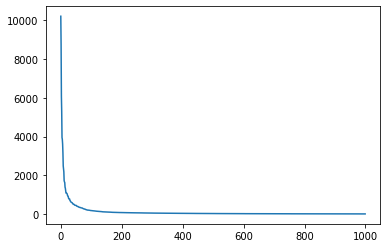

In [18]:
# Let's plot the count of the 1000 most used words:

import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter

wc = Counter()
for text in corpus:
    wc.update(text.split(" "))
    
freq = [f for w,f in wc.most_common(1000)]

plt.plot(freq[:1000])
print(wc.most_common(20))

**Let's remove stopwords:** english stop words: direclty on sklearn 

- **stop_words:** string {‘english’}, list, or None (default)
    - If ‘english’, a built-in stop word list for English is used. There are several known issues with ‘english’ and you should consider an alternative (see Using stop words).
    - If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens. Only applies if analyzer == 'word'.
    - If None, no stop words will be used. max_df can be set to a value in the range [0.7, 1.0) to automatically detect and filter stop words based on intra corpus document frequency of terms.

[see CountVectorizer for full doc](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [19]:
# French stop words: nltk
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
final_stopwords_list = stopwords.words('english') + stopwords.words('french')
#print(final_stopwords_list)
vectorizer = CountVectorizer(stop_words=final_stopwords_list)
#vectorizer = TfidfVectorizer(stop_words=final_stopwords_list)

**Build your own list**

In [12]:
# CountVectorizer can take a list of stop words as argument.
# Build or download a list of stop word (from NLTK for exemple)

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')

# remove stop words
stop_words = list(stopwords.words('french'))

vectorizer = CountVectorizer(stop_words=stop_words)
print(X.shape)
X = vectorizer.fit_transform(corpus)
X.shape

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(8738, 12617)


(8738, 12504)

In [ ]:
# print(len(X_train))
# stemmer = snowballstemmer.stemmer('french');
# for i in range(len(X_train)):
#     stemmer.stemWords(X_train[i].split()[j] for j in range(len(X_train[i].split())))
# print(np.array(X_train).shape)
# for i in range(len(X_test)):
#     stemmer.stemWords(X_test[i].split()[j] for j in range(len(X_test[i].split())))

**(b) Dictionary processing, restricting vocabulary size: corpus-specific stopwords** => max_df + suppress rare words (min_df) + max_features 

- **max_df:** float in range [0.0, 1.0] or int, default=1.0
When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

- **min_df:** float in range [0.0, 1.0] or int, default=1
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

- **max_features:** int or None, default=None
If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.
This parameter is ignored if vocabulary is not None.

[see CountVectorizer for full doc](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [22]:
# max_df: float (ratio) / integer(number) of document above which we remove the word)
# min_df: float (ratio) / integer(number) of document under which we remove the word)

min_df=5
max_df=0.5
max_features=10000
vectorizer = CountVectorizer(max_df=max_df,min_df=min_df,max_features=max_features)  #try out some values
X = vectorizer.fit_transform(corpus)
#What is the dictionnary size now ?
dic_size = X.shape[1]###
print(dic_size)

3484


**(c) : Binary BoW**: instead of word counts, the bag of word vector can only represent used word.

- **binary:** boolean, default=False
If True, all non zero counts are set to 1. This is useful for discrete probabilistic models that model binary events rather than integer counts.

[see CountVectorizer for full doc](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [20]:
min_df=5
max_df=0.5
max_features=10000
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(corpus)
dic_size = X.shape[1]###
print(X.shape)

print(type(X))

(8738, 12617)
<class 'scipy.sparse.csr.csr_matrix'>


**(d) TF-IDF**: words can also be weighted by importance. $\mbox{Corpus : } C = \{\mathbf d_{1},\ldots,\mathbf d_{|C|}\}$, vocabulary $V = \{\mathbf w_{1},\ldots,\mathbf w_{|V|}\}$: 
- **$d_{ik}^{(tf)}$ term frequency** for word $w_k$ in document $d_i$, s.t. $\sum\limits_{k=1}^{|V|}d_{ik}^{(tf)}=1$
- **$\mathrm{df_{k}}$ document frequency** $\mathrm{df_{k}} =  \frac{|\{\mathbf d: t_{k} \in \mathbf d\}|}{|C|}$

$$ d_{ik}^{(tfidf)} = d_{ik}^{(tf)}   \log \frac{1}{\mathrm{df_{k}}} $$


## [TfidfVectorizer from scikit can be directly used](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer): experiment it!

**Main paramters:**
- **use_idf:** boolean, default=True. 
- **smooth_idf:** Smooth idf weights, default=True. Adds one to document frequencies, as if an extra document was seen containing every term in the collection exactly once. Prevents zero divisions.
- **sublinear_tf:** boolean, default=bool, default=False. Apply sublinear tf scaling, i.e. replace $d_{ik}^{(tf)}$ with $1 + log(d_{ik}^{(tf)})$.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

use_idf=True,          
smooth_idf=True
sublinear_tf=False

vectorizer = TfidfVectorizer(use_idf= use_idf, smooth_idf=smooth_idf, sublinear_tf=sublinear_tf)
X = vectorizer.fit_transform(corpus)
print(X.shape)

(8738, 12617)


**(e) n-grams**: instead of words, consider n-uplets of words as tokens

- **ngram_range:** tuple (min_n, max_n)
The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

- **analyzer:** string, {‘word’, ‘char’, ‘char_wb’} or callable
Whether the feature should be made of word or character n-grams. Option ‘char_wb’ creates character n-grams only from text inside word boundaries; n-grams at the edges of words are padded with space.
If a callable is passed it is used to extract the sequence of features out of the raw, unprocessed input.

[see CountVectorizer for full doc](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [22]:
ngram_range = (1,2) # unigrams and bigrams
vectorizer = CountVectorizer(ngram_range=ngram_range,analyzer='word') # Maybe 2-grams or 3-grams bring improvements ?
X = vectorizer.fit_transform(corpus)
#What is the dictionnary size now ?
dic_size = X.shape[1]###
print(dic_size)

91946


# B) Extraction du vocabulaire (BoW)

- **Exploration préliminaire des jeux de données**
    - Quelle est la taille d'origine du vocabulaire?
    - Que reste-t-il si on ne garde que les 100 mots les plus fréquents? [word cloud]
    - Quels sont les 100 mots dont la fréquence documentaire est la plus grande? [word cloud]
    - Quels sont les 100 mots les plus discriminants au sens de odds ratio? [word cloud]
    - Quelle est la distribution d'apparition des mots (Zipf)
    - Quels sont les 100 bigrammes/trigrammes les plus fréquents?

- **Variantes de BoW**
    - TF-IDF
    - Réduire la taille du vocabulaire (min_df, max_df, max_features)
    - BoW binaire
    - Bi-grams, tri-grams
    - **Quelles performances attendrent? Quels sont les avantages et les inconvénients des ces variantes?**

In [24]:
# On se limite au premier modèle de représentation bow
vectorizer = CountVectorizer(preprocessor=preprocess)
X = vectorizer.fit_transform(corpus)

In [26]:
# La taille d'origine du vocabulaire
print('Taille du vocabulaire :', X.shape[1])

Taille du vocabulaire : 12098


(-0.5, 399.5, 199.5, -0.5)

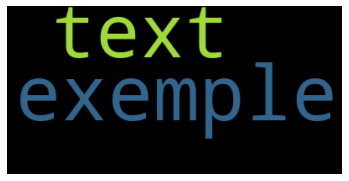

In [27]:
# Que se passe t'il si on ne garde que les 100 mots les plus fréquents
from wordcloud import WordCloud

# Get text:
text = "this is exemple text"

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


# C) Modèles de Machine Learning

## 1) Métriques d'évaluation 

Il faudra utiliser des métriques d'évaluation pertinentes suivant la tâche et l'équilibrage des données : 
- Accuracy
- Courbe ROC, AUC, F1-score

## 2) Variantes sur les stratégies d'entraînement

- **Sur-apprentissage**. Les techniques sur lesquelles nous travaillons étant sujettes au sur-apprentissage: trouver le paramètre de régularisation dans la documentation et optimiser ce paramètre au sens de la métrique qui vous semble la plus appropriée (cf question précédente).

 <br>
- **Equilibrage des données**. Un problème reconnu comme dur dans la communauté est celui de l'équilibrage des classes (*balance* en anglais). Que faire si les données sont à 80, 90 ou 99% dans une des classes?
Le problème est dur mais fréquent; les solutions sont multiples mais on peut isoler 3 grandes familles de solution.

1. Ré-équilibrer le jeu de données: supprimer des données dans la classe majoritaire et/ou sur-échantilloner la classe minoritaire.<BR>
   $\Rightarrow$ A vous de jouer pour cette technique
1. Changer la formulation de la fonction de coût pour pénaliser plus les erreurs dans la classe minoritaire:
soit une fonction $\Delta$ mesurant les écarts entre $f(x_i)$ et $y_i$ 
$$C = \sum_i  \alpha_i \Delta(f(x_i),y_i), \qquad \alpha_i = \left\{
\begin{array}{ll}
1 & \text{si } y_i \in \text{classe majoritaire}\\
B>1 & \text{si } y_i \in \text{classe minoritaire}\\
\end{array} \right.$$
<BR>
   $\Rightarrow$ Les SVM et d'autres approches sklearn possèdent des arguments pour régler $B$ ou $1/B$... Ces arguments sont utiles mais pas toujours suffisant.
1. Courbe ROC et modification du biais. Une fois la fonction $\hat y = f(x)$ apprise, il est possible de la *bidouiller* a posteriori: si toutes les prédictions $\hat y$ sont dans une classe, on va introduire $b$ dans $\hat y = f(x) + b$ et le faire varier jusqu'à ce qu'un des points change de classe. On peut ensuite aller de plus en plus loin.
Le calcul de l'ensemble des scores associés à cette approche mène directement à la courbe ROC.

**Note:** certains classifieurs sont intrinsèquement plus résistante au problème d'équilibrage, c'est par exemple le cas des techniques de gradient boosting que vous verrez l'an prochain.


## 3) Estimer les performances de généralisation d'une méthodes
**Ce sera l'enjeu principal du projet : vous disposez d'un ensemble de données, et vous évaluerez les performances sur un ensemble de test auquel vous n'avez pas accès. Il faut donc être capable d'estimer les performances de généralisation du modèles à partir des données d'entraînement.**


Avant de lancer de grandes expériences, il faut se construire une base de travail solide en étudiant les questions suivantes:

- Combien de temps ça prend d'apprendre un classifieur NB/SVM/RegLog sur ces données en fonction de la taille du vocabulaire?
- La validation croisée est-elle nécessaire? Est ce qu'on obtient les mêmes résultats avec un simple *split*?
- La validation croisée est-elle stable? A partir de combien de fold (travailler avec différentes graines aléatoires et faire des statistiques basiques)?

 # Post traitement
 A kindof aposteriori on the data using the apriori of : if one locutor speaks

# Test

In [11]:
# Using a variable for the top k features to be selected
import numpy as np
import pandas as pd
from scipy import sparse as sp
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest


top_k_features=1000
text_processor = Pipeline([
 ('count vectorizer',CountVectorizer(stop_words=stop_words,lowercase=True)),
 ('chi2score',SelectKBest(chi2,k=top_k_features)),
 ('tf_transformer',TfidfTransformer(use_idf=True))
])

NameError: name 'stop_words' is not defined

In [31]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [32]:
def display_model_scores(model, X_test, Y_test, search=True):
    if search:
        best_parameters = model.best_estimator_.get_params()
        for param_name in sorted(best_parameters.keys()):
            print("--->%s: %r" % (param_name, best_parameters[param_name]))
        # print(model.best_score_)
    grid_predictions = model.predict(X_test)
    print(confusion_matrix(Y_test, grid_predictions))
    print(classification_report(Y_test, grid_predictions))  

In [61]:
search = True
sw = stopwords.words('french')

if search :
    
    pipeline_svc = Pipeline(
        [
            ("vect", TfidfVectorizer(max_features=100_000)), # avoids overfit on train set (having more features than individuals is bad most of the time)
            ("clf", LinearSVC(class_weight="balanced",       # balanced class weight parameter is mandatory in our case
                              max_iter=1000,                 # also avoids overfit
                              C=100))                        # regularization so the model doesn't predict only one class  
        ]
    )

    parameters_vectorizer = {
        "vect__lowercase": (False,),
        "vect__stop_words": (None,),
        "vect__strip_accents": ("ascii",),
        "vect__use_idf": (True,),
        "vect__smooth_idf": (False,),
        "vect__sublinear_tf": (True,),
        
        "vect__min_df": (1,),
        "vect__max_df": np.arange(0.4,0.6,0.05),
        "vect__ngram_range": [(1, 2),],
        }
    
    strat_kfold = StratifiedKFold(n_splits=3, shuffle=True)

    grid_search_parameters_svc = GridSearchCV(pipeline_svc, 
                                              parameters_vectorizer, 
                                              scoring="f1_micro", # test "rog_auc", "f1_micro"
                                              n_jobs=8, 
                                              verbose=3, 
                                              cv=strat_kfold,
                                              refit=True
                                              )
    
    print("============================================= SVC + VECTORIZER =============================================")
    t0 = time.time()
    grid_search_parameters_svc.fit(X_train, Y_train)
    print("done in %0.3fs" % (time.time() - t0))
    display_model_scores(grid_search_parameters_svc, X_train, Y_train) # check overfit X_train
    display_model_scores(grid_search_parameters_svc, X_test, Y_test)

============================================= SVC + VECTORIZER =============================================
Fitting 3 folds for each of 4 candidates, totalling 12 fits


KeyboardInterrupt: 